# <center> An Introduction to Deep Learning With Python <center/>

### [3.3] Classifying newswire: a multiclass classification example
Prof. Yuzo Iano

pgs: 78 - 84

#### The Reuters dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


#### Decoding newswire back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
train_labels[10]

3

#### Preparing the data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate (labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#### Building your network

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


#### Compiling the model

In [11]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#### Validating your approach

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 5s 650us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7206 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 4s 457us/step - loss: 1.4451 - acc: 0.6875 - val_loss: 1.3453 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 6s 796us/step - loss: 1.0950 - acc: 0.7653 - val_loss: 1.1710 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 7s 826us/step - loss: 0.8691 - acc: 0.8156 - val_loss: 1.0803 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 6s 733us/step - loss: 0.7028 - acc: 0.8474 - val_loss: 0.9843 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 5s 616us/step - loss: 0.5662 - acc: 0.8796 - val_loss: 0.9419 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 5s 660us/step - loss: 0.4579 - acc: 0.9044 - val_loss: 0.9087 - val_acc: 0.8000


#### Plotting the training and validation loss

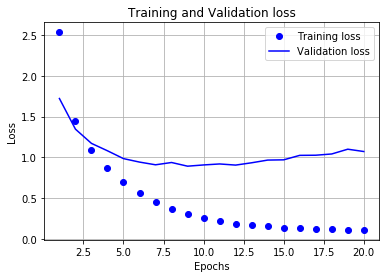

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

#### Plotting the training and validation accuracy

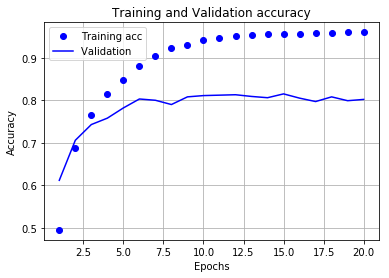

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation ')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

#### Retraining a model from scratch

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512,
          validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 5s 589us/step - loss: 0.0735 - acc: 0.9803 - val_loss: 0.0503 - val_acc: 0.9857
Epoch 2/9
7982/7982 [==============================] - 3s 426us/step - loss: 0.0417 - acc: 0.9887 - val_loss: 0.0391 - val_acc: 0.9898
Epoch 3/9
7982/7982 [==============================] - 4s 442us/step - loss: 0.0320 - acc: 0.9914 - val_loss: 0.0355 - val_acc: 0.9902
Epoch 4/9
7982/7982 [==============================] - 3s 424us/step - loss: 0.0261 - acc: 0.9928 - val_loss: 0.0341 - val_acc: 0.9907
Epoch 5/9
7982/7982 [==============================] - 4s 460us/step - loss: 0.0218 - acc: 0.9939 - val_loss: 0.0322 - val_acc: 0.9912
Epoch 6/9
7982/7982 [==============================] - 4s 466us/step - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0305 - val_acc: 0.9919
Epoch 7/9
7982/7982 [==============================] - 4s 464us/step - loss: 0.0152 - acc: 0.9954 - val_loss: 0.0300 - val_acc: 0.9920
Epoch 8

In [17]:
results = model.evaluate(x_test, one_hot_test_labels)
print('Results [loss, acc] = ', results)

2246/2246 [==============================] - 1s 632us/step
Results [loss, acc] =  [0.03402860169419198, 0.990843640409828]


In [18]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.182546749777382

#### Generating predictions on new data

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions[0].shape

(46,)

In [21]:
np.sum(predictions[0])

0.99999976

In [22]:
np.argmax(predictions[0])

3

#### A different way to handle the labels and the loss


In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [24]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

#### The importance of having sufficiently large intermediate layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512,
          validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 5s 619us/step - loss: 0.0918 - acc: 0.9783 - val_loss: 0.0828 - val_acc: 0.9783
Epoch 2/9
7982/7982 [==============================] - 3s 417us/step - loss: 0.0764 - acc: 0.9785 - val_loss: 0.0705 - val_acc: 0.9790
Epoch 3/9
7982/7982 [==============================] - 4s 473us/step - loss: 0.0641 - acc: 0.9808 - val_loss: 0.0607 - val_acc: 0.9822
Epoch 4/9
7982/7982 [==============================] - 4s 476us/step - loss: 0.0549 - acc: 0.9841 - val_loss: 0.0538 - val_acc: 0.9846
Epoch 5/9
7982/7982 [==============================] - 3s 418us/step - loss: 0.0481 - acc: 0.9874 - val_loss: 0.0490 - val_acc: 0.9878
Epoch 6/9
7982/7982 [==============================] - 3s 415us/step - loss: 0.0433 - acc: 0.9896 - val_loss: 0.0462 - val_acc: 0.9891
Epoch 7/9
7982/7982 [==============================] - 4s 471us/step - loss: 0.0400 - acc: 0.9902 - val_loss: 0.0443 - val_acc: 0.9892
Epoch 8

In [26]:
results = model.evaluate(x_test, one_hot_test_labels)
print('Results [loss, acc] = ', results)

2246/2246 [==============================] - 2s 800us/step
Results [loss, acc] =  [0.043604926223587165, 0.9893046785759693]


###### Pablo Minango
* pablodavid218@gmail.com 